In [52]:
# Import Pandas for data transformation, cleaning and analysis.

import pandas as pd

In [53]:
# Extract the data from a csv file.

df = pd.read_csv('AB_NYC_2019.csv')

In [54]:
# Information about the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [55]:
# Finding number of rows with null values.

null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

In [56]:
# I am replacing null names and hostnames with Unknown, as they are not critical for analysis. Otherwise, I'd have dropped them.

df['name'] = df['name'].fillna("Unknown")
df['host_name'] = df['host_name'].fillna("Unknown")

# dr.dropna(subset=['name', 'hostname'], inplace=True)

In [57]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [58]:
# Replacing the last review's NaN with NaT, so that it can be used in analysis and it's corresponding number_of_reviews from NaN to 0.

df['last_review'] = df['last_review'].fillna('No review')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,2,0,No review,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,4,0,No review,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,10,0,No review,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,1,0,No review,0.00,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76,-73.99,Private room,90,7,0,No review,0.00,1,23


In [59]:
# Checking for any duplicate rows if present.

df.duplicated().sum()

np.int64(0)

In [60]:
# Display only 2 decimal places in float dtypes

pd.options.display.float_format = '{:.2f}'.format
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,No review,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [61]:
# What is the distribution of different room types (e.g., Entire home/apt, Private room, Shared room)?

df.groupby('room_type')['id'].count()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: id, dtype: int64

In [62]:
# What are the average prices by room type?

df.groupby('room_type')['price'].mean()

room_type
Entire home/apt   211.79
Private room       89.78
Shared room        70.13
Name: price, dtype: float64

In [63]:
# How do prices vary across different neighborhoods? i.e. most expensive to cheapest.

df.groupby('neighbourhood')['price'].mean().reset_index().sort_values(by='price', ascending=False)

,neighbourhood,price
82,Fort Wadsworth,800.00
219,Woodrow,700.00
197,Tribeca,490.64
174,Sea Gate,487.86
167,Riverdale,442.09
...,...,...
141,New Dorp,57.00
179,Soundview,53.47
196,Tremont,51.55
102,Hunts Point,50.50


In [64]:
# What is the average number of reviews per listing?

df['number_of_reviews'].mean()

np.float64(23.274465691788528)

In [65]:
# Listing with most reviews

max_review_count = df['number_of_reviews'].max()
df[df['number_of_reviews'] == max_review_count ]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.67,-73.77,Private room,47,1,629,2019-07-05,14.58,2,333


In [66]:
# Finding corelation between number of reviews and listing price

df['number_of_reviews'].corr(df['price'])

np.float64(-0.04795422658266215)

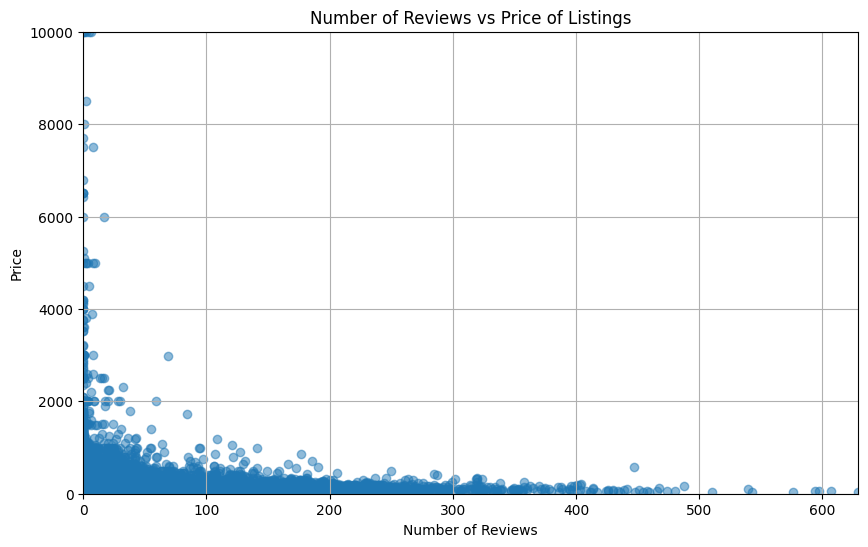

In [67]:
# Trying to understand which price points have more reviews using scatterplot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['number_of_reviews'], df['price'], alpha=0.5)
plt.title('Number of Reviews vs Price of Listings')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.xlim(0, df['number_of_reviews'].max())
plt.ylim(0, df['price'].max())
plt.grid(True)
plt.show()

In [68]:
# Finding host with max listings

x = df.groupby('host_id').size().reset_index(name='listing_count')
x.loc[x['listing_count'].idxmax()]

host_id          219517861
listing_count          327
Name: 34646, dtype: int64

In [69]:
# All listings of the host with max listings
df[df['host_id'] == 219517861]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.71,-74.01,Entire home/apt,302,29,0,No review,0.00,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.71,-74.01,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.71,-74.00,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.75,-73.98,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.75,-73.98,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.71,-74.01,Entire home/apt,135,29,0,No review,0.00,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.71,-74.01,Entire home/apt,165,29,0,No review,0.00,327,342
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.71,-74.01,Entire home/apt,165,29,0,No review,0.00,327,347
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.71,-74.01,Entire home/apt,699,29,0,No review,0.00,327,327


In [70]:
# Average listings per host

df.groupby('host_id')['calculated_host_listings_count'].mean().reset_index(name='average_listings')
# df['calculated_host_listings_count'].mean() #Avg listings

,host_id,average_listings
0,2438,1.00
1,2571,1.00
2,2787,6.00
3,2845,2.00
4,2868,1.00
...,...,...
37452,274273284,1.00
37453,274298453,1.00
37454,274307600,1.00
37455,274311461,1.00


In [71]:
# Finding corelation between number of listings and number of reviews

df['calculated_host_listings_count'].corr(df['number_of_reviews'])

# -0.07 tells that these two have weak corelation and negative shows that they do opposite ways meaning that 

np.float64(-0.07237606054177596)

In [72]:
# Average room availability accross the year

df['availability_365'].mean()

np.float64(112.78132733408324)

In [73]:
# Corelation between availability and price

df['availability_365'].corr(df['price'])

np.float64(0.08182882742168793)

In [74]:
# What is the average minimum nights requirement across different room types?

df.groupby('room_type')['minimum_nights'].mean()

room_type
Entire home/apt   8.51
Private room      5.38
Shared room       6.47
Name: minimum_nights, dtype: float64

In [75]:
# Average minimum nights in different neighbourhoods

avg_min_nights = df.groupby('neighbourhood')['minimum_nights'].mean().reset_index()
avg_min_nights.rename(columns={'minimum_nights': 'avg_min_nights'}).sort_values(by='avg_min_nights', ascending=False)

,neighbourhood,avg_min_nights
184,Spuyten Duyvil,48.25
146,North Riverdale,41.40
6,Battery Park City,30.33
149,Olinville,23.50
204,Vinegar Hill,18.35
...,...,...
218,Woodlawn,1.45
62,East Morrisania,1.40
148,Oakwood,1.20
21,Breezy Point,1.00
